In [1]:
# import tensorflow for neural networks
import tensorflow as tf

tf.__version__

'2.13.0'

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import TimeDistributed, Dense, RepeatVector, Conv1D, LSTM, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape
from keras.models import Model
import seaborn as sns
import pickle
from scipy import stats
from pylab import rcParams
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "abnormality"]

In [3]:
# reading out the first dataset

data = pd.read_csv("ssdp.csv", index_col = 0)
df = data.copy()

df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,1.000000,209.000000,0.000000,1.000000,209.000000,0.000000,1.000000,209.000000,0.000000,1.000000,...,0.0,0.0,1.000000,209.000000,0.000000,209.000000,0.000000e+00,0.0,0.0,0
1,1.997162,830.381872,385019.472302,1.998296,830.029123,385019.970028,1.999432,829.676374,385020.218892,1.999943,...,0.0,0.0,1.000000,1450.000000,0.000000,1450.000000,0.000000e+00,0.0,0.0,0
2,2.996940,586.005354,375805.676539,2.998163,585.869927,375719.284013,2.999387,585.734436,375632.816999,2.999939,...,0.0,0.0,1.999994,153.499836,55.500000,153.499836,3.080250e+03,0.0,0.0,0
3,3.994740,802.288440,421819.598158,3.996842,802.073133,421799.114652,3.998947,801.857734,421778.523489,3.999895,...,0.0,0.0,1.999998,1450.000000,0.000022,1450.000000,4.656613e-10,0.0,0.0,0
4,4.994129,661.265167,416790.002134,4.996476,661.159177,416736.772500,4.998825,661.053084,416683.474585,4.999882,...,0.0,0.0,2.999991,134.999832,52.325843,134.999832,2.737994e+03,0.0,0.0,0


In [4]:
# reading out the second dataset

data1 = pd.read_csv("ssl_reg.csv", index_col = 0)
df1 = data1.copy()

df1.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,1.000000,1452.0,0.000000e+00,1.000000,1452.0,0.000000e+00,1.000000,1452.0,0.000000e+00,1.000000,...,0.0,0.0,1.000000,1452.0,0.000000,1452.0,0.000000e+00,0.0,0.0,0
1,1.999512,1452.0,0.000000e+00,1.999707,1452.0,4.656613e-10,1.999902,1452.0,0.000000e+00,1.999990,...,0.0,0.0,1.999999,1452.0,0.000000,1452.0,0.000000e+00,0.0,0.0,0
2,2.998694,1452.0,4.656613e-10,2.999216,1452.0,4.656613e-10,2.999739,1452.0,4.656613e-10,2.999974,...,0.0,0.0,2.999997,1452.0,0.000000,1452.0,0.000000e+00,0.0,0.0,0
3,3.997510,1452.0,4.656613e-10,3.998506,1452.0,0.000000e+00,3.999502,1452.0,0.000000e+00,3.999950,...,0.0,0.0,3.999995,1452.0,0.000000,1452.0,0.000000e+00,0.0,0.0,0
4,4.995598,1452.0,0.000000e+00,4.997358,1452.0,0.000000e+00,4.999119,1452.0,0.000000e+00,4.999912,...,0.0,0.0,4.999991,1452.0,0.000022,1452.0,4.656613e-10,0.0,0.0,0


In [5]:
df.shape, df1.shape

((4077266, 47), (2207571, 47))

In [6]:
df["label"].value_counts()

label
0    2637662
1    1439604
Name: count, dtype: int64

In [7]:
df1["label"].value_counts()

label
0    2114919
1      92652
Name: count, dtype: int64

In [8]:
data_set = pd.concat([df, df1], join = "inner")

In [9]:
data_set.shape

(6284837, 47)

In [10]:
normal = data_set[data_set.label == 1]
abnormality = data_set[data_set.label == 0]

In [11]:
normal.tail(20)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
2207453,70.163928,1423.500283,21864.975195,106.074630,1415.792377,29481.590663,283.086742,1406.874436,36832.581840,2598.046828,...,0.000198,0.000079,17986.316164,1406.276031,194.566465,1407.556334,37856.109479,1.049650,0.002795,1
2207454,71.163464,1423.900766,21568.978433,107.074210,1416.130531,29218.382160,284.086368,1407.033280,36710.071797,2599.046485,...,0.000198,0.000079,17987.315926,1406.278573,194.561355,1407.558874,37854.121103,1.049537,0.002794,1
2207455,72.134128,1424.290307,21280.760389,108.047723,1416.462509,28959.758745,285.062942,1407.191024,36588.361276,2600.025052,...,0.000198,0.000079,17988.301093,1406.281114,194.556246,1407.561413,37852.132934,1.049425,0.002794,1
2207456,73.100638,1424.669369,21000.004468,109.017623,1416.788488,28705.594057,286.036468,1407.347678,36467.441252,2601.000904,...,0.000198,0.000079,17989.284386,1406.283656,194.551137,1407.563952,37850.144971,1.049311,0.002794,1
2207457,74.067968,1425.038363,20726.429715,109.988386,1417.108627,28455.776626,287.010896,1407.503255,36347.304495,2601.977650,...,0.000198,0.000079,17990.268303,1406.286197,194.546028,1407.566491,37848.157214,1.049198,0.002794,1
2207493,62.937796,1417.363510,24045.458892,99.796605,1412.347858,30409.856601,277.925819,1405.828336,36993.398826,2593.686869,...,0.000196,0.000078,17984.834242,1406.260382,194.571420,1407.540698,37858.037845,1.047483,0.002791,1
2207512,60.884661,1417.932397,23669.904913,97.863065,1412.753037,30115.019826,276.175463,1405.995519,36867.141066,2592.108653,...,0.000197,0.000079,17984.045686,1406.262925,194.566310,1407.543238,37856.049080,1.051529,0.002803,1
2207513,61.854483,1418.483167,23305.694178,98.833958,1413.150137,29825.743941,277.148080,1406.161511,36741.726648,2593.082951,...,0.000197,0.000079,17985.027854,1406.265468,194.561199,1407.545779,37854.060521,1.051380,0.002803,1
2207514,62.828780,1419.016630,22952.349803,99.809314,1413.539378,29541.887127,278.125043,1406.326324,36617.149178,2594.061396,...,0.000197,0.000079,17986.012904,1406.268011,194.556090,1407.548319,37852.072169,1.051266,0.002803,1
2207515,63.783474,1419.533745,22609.290673,100.766125,1413.921060,29263.248373,279.084921,1406.489979,36493.392799,2595.023971,...,0.000196,0.000079,17986.986955,1406.270553,194.550980,1407.550860,37850.084022,1.051153,0.002802,1


In [12]:
normal.shape

(1532256, 47)

In [13]:
normal = normal.reset_index(drop = True)
normal

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,1.985540,98.276748,1.443923e+03,1.995706,98.081771,1.443993e+03,2.207518,94.427813,1.431239e+03,3.570497,...,0.000000,0.000000,1.000000,136.000000,0.000000,136.000000,0.000000,0.000000,0.000000,1
1,1.000000,136.000000,0.000000e+00,1.000000,136.000000,0.000000e+00,1.000000,136.000000,0.000000e+00,1.000000,...,0.000000,0.000000,1.000000,136.000000,0.000000,136.000000,0.000000,0.000000,0.000000,1
2,1.000000,135.999997,1.976198e-04,1.000067,135.997469,1.923234e-01,1.071123,133.239590,2.021713e+02,3.532440,...,0.000000,0.000000,1.000000,136.000000,0.000000,136.000000,0.000000,0.000000,0.000000,1
3,1.000000,136.000000,3.637979e-12,1.000023,136.000000,7.275958e-12,1.028412,136.000000,7.275958e-12,1.700407,...,0.000000,0.000000,1.000000,136.000000,0.000000,136.000000,0.000000,0.000000,0.000000,1
4,1.998255,136.000000,3.637979e-12,1.998975,136.000000,3.637979e-12,2.028053,136.000000,0.000000e+00,2.700348,...,0.000000,0.000000,1.000000,136.000000,0.000000,136.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532251,69.636127,1422.328092,2.074624e+04,106.628646,1416.062378,2.769462e+04,284.960233,1407.448011,3.576785e+04,2600.909084,...,0.000196,0.000079,17992.907398,1406.285802,194.520331,1407.566095,37838.159483,1.050476,0.002801,1
1532252,70.606213,1422.748337,2.046470e+04,107.601160,1416.396367,2.744913e+04,285.935746,1407.603823,3.564968e+04,2601.886733,...,0.000196,0.000079,17993.891936,1406.288343,194.515225,1407.568633,37836.172782,1.050363,0.002801,1
1532253,71.459054,1411.318738,2.938279e+04,108.466545,1408.924973,3.319504e+04,286.816456,1404.808991,3.775792e+04,2602.778164,...,0.000196,0.000079,17994.816851,1406.243870,194.601283,1407.524200,37869.659628,1.051598,0.002803,1
1532254,57.639826,1412.024522,2.890124e+04,95.348413,1409.376737,3.286615e+04,274.789630,1404.980726,3.762859e+04,2591.707889,...,0.000197,0.000079,17987.454364,1406.246413,194.596173,1407.526741,37867.670677,1.057291,0.002819,1


In [14]:
abnormality.describe(include = "all")

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
count,4.752581e+06,4.752581e+06,4.752581e+06,4.752581e+06,4.752581e+06,4.752581e+06,4.752581e+06,4.752581e+06,4.752581e+06,4.752581e+06,...,4.752581e+06,4.752581e+06,4.752581e+06,4.752581e+06,4.752581e+06,4.752581e+06,4.752581e+06,4.752581e+06,4.752581e+06,4752581.0
mean,9.785446e+01,7.750756e+02,3.441822e+05,1.575455e+02,7.754925e+02,3.441384e+05,4.598386e+02,7.759714e+02,3.440649e+05,4.489946e+03,...,-3.429371e+00,-4.236992e-04,2.074403e+04,7.781095e+02,1.285199e+02,8.778740e+02,3.265690e+04,-4.825669e+00,-9.542606e-04,0.0
std,5.037475e+01,3.096000e+02,1.674102e+05,7.663470e+01,3.091767e+02,1.669769e+05,2.170310e+02,3.088045e+02,1.665971e+05,2.087257e+03,...,2.787457e+02,1.641545e-02,7.210728e+03,6.403419e+02,1.136212e+02,6.253738e+02,2.905609e+04,2.958505e+02,2.049246e-02,0.0
min,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,...,-4.408914e+04,-1.187224e+00,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,0.000000e+00,-4.347825e+04,-1.203576e+00,0.0
25%,6.159751e+01,7.250173e+02,3.981325e+05,9.537348e+01,7.273188e+02,3.987027e+05,2.724495e+02,7.298454e+02,3.988062e+05,2.692788e+03,...,0.000000e+00,0.000000e+00,1.612519e+04,1.573235e+02,1.398491e-04,1.605613e+02,2.887100e-08,0.000000e+00,0.000000e+00,0.0
50%,9.305408e+01,7.407819e+02,4.327320e+05,1.598491e+02,7.409018e+02,4.335980e+05,4.899893e+02,7.412977e+02,4.344417e+05,4.793869e+03,...,0.000000e+00,0.000000e+00,2.255686e+04,2.158604e+02,1.903996e+02,1.402026e+03,3.896072e+04,0.000000e+00,0.000000e+00,0.0
75%,1.237385e+02,7.507212e+02,4.394198e+05,1.939307e+02,7.490778e+02,4.387136e+05,5.530505e+02,7.473538e+02,4.380633e+05,5.186456e+03,...,0.000000e+00,0.000000e+00,2.594165e+04,1.450000e+03,2.104224e+02,1.450000e+03,4.494700e+04,0.000000e+00,0.000000e+00,0.0
max,3.605826e+02,1.452000e+03,4.569629e+05,5.330757e+02,1.452000e+03,4.585212e+05,1.222241e+03,1.452000e+03,4.522027e+05,1.047422e+04,...,9.605642e+04,1.107421e+00,4.482975e+04,1.452000e+03,6.945029e+02,1.452000e+03,4.826106e+05,9.794159e+04,1.126718e+00,0.0


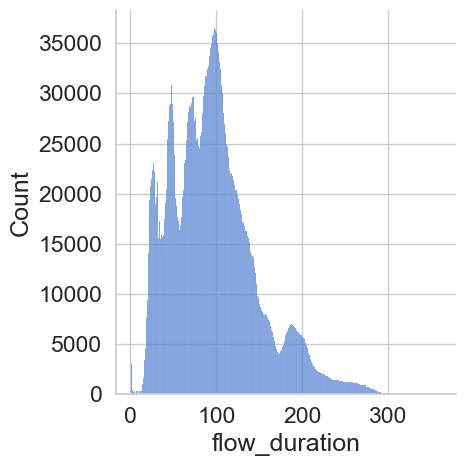

In [15]:
sns.displot(abnormality.flow_duration);

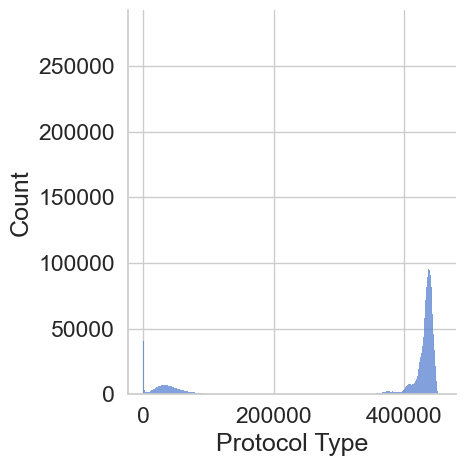

In [16]:
sns.displot(abnormality["Protocol Type"]);

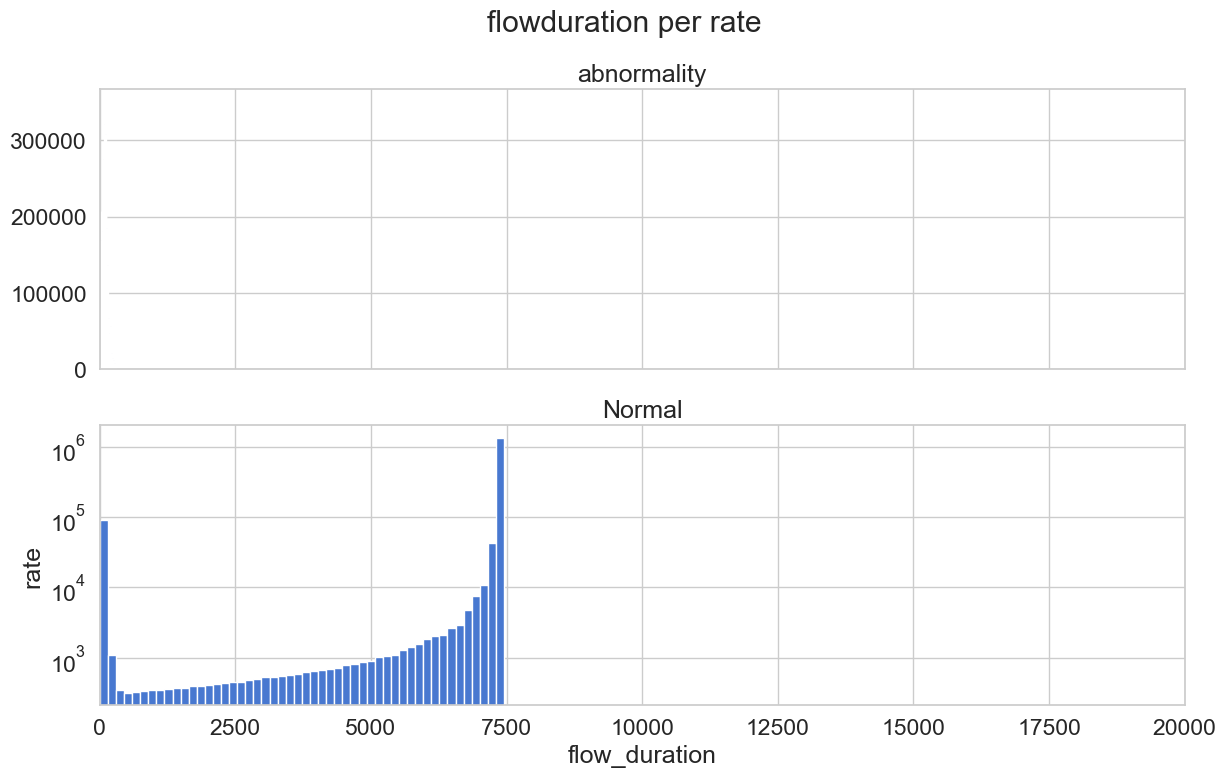

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('flowduration per rate')

bins = 50

ax1.hist(abnormality.flow_duration, bins = bins)
ax1.set_title('abnormality')

ax2.hist(normal.flow_duration, bins = bins)
ax2.set_title('Normal')

plt.xlabel('flow_duration')
plt.ylabel('rate')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

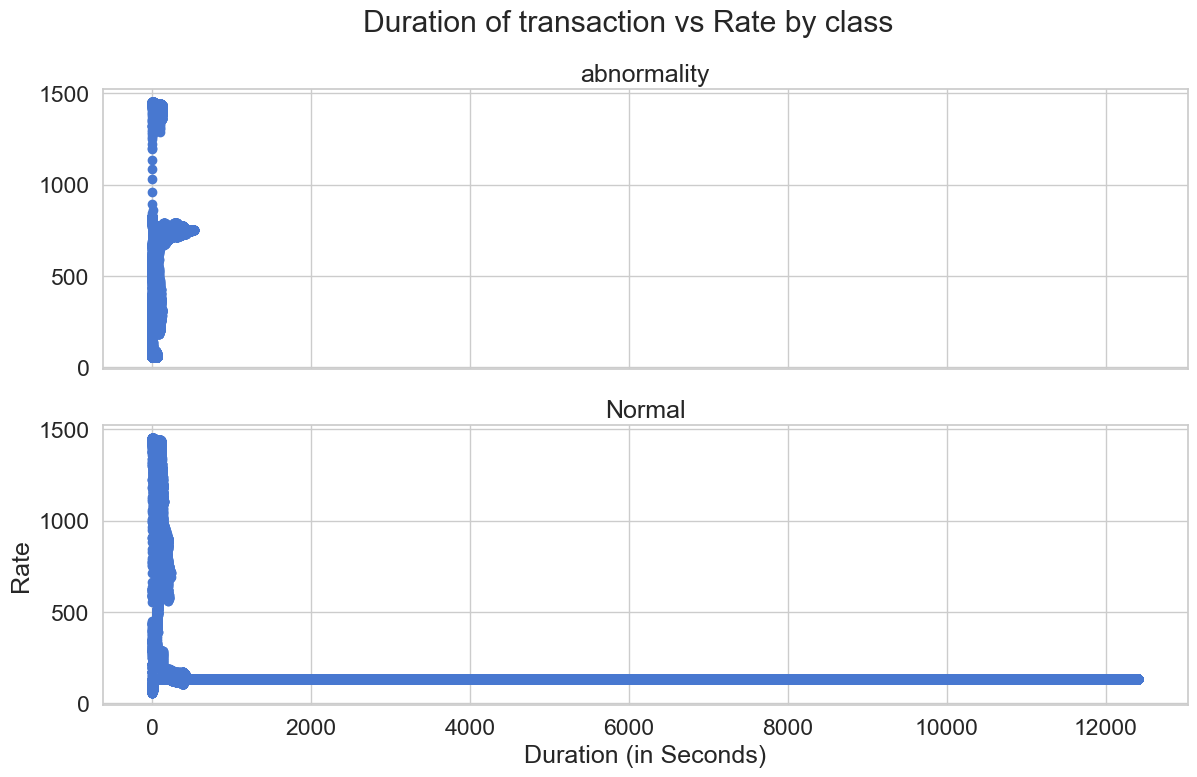

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Duration of transaction vs Rate by class')

ax1.scatter(abnormality.Duration, abnormality.Rate)
ax1.set_title('abnormality')

ax2.scatter(normal.Duration, normal.Rate)
ax2.set_title('Normal')

plt.xlabel('Duration (in Seconds)')
plt.ylabel('Rate')
plt.show()

Doesn't seem like the time of transaction really matters.

# Autoencoders
Autoencoders can seem quite bizarre at first. The job of those models is to predict the input, given that same input. Puzzling? Definitely was for me, the first time I heard it.

More specifically, let’s take a look at Autoencoder Neural Networks. This autoencoder tries to learn to approximate the following identity function:

𝑓𝑊,𝑏(𝑥)≈𝑥
While trying to do just that might sound trivial at first, it is important to note that we want to learn a compressed representation of the data, thus find structure. This can be done by limiting the number of hidden units in the model. Those kind of autoencoders are called undercomplete.

Here's a visual representation of what an Autoencoder might learn:



# Reconstruction error
We optimize the parameters of our Autoencoder model in such way that a special kind of error - reconstruction error is minimized. In practice, the traditional squared error is often used:

𝐿(𝑥,𝑥′)=||𝑥−𝑥′||2
If you want to learn more about Autoencoders I highly recommend the following videos by Hugo Larochelle:

# Preparing the data
First, let's drop the Time column (not going to use it) and use the scikit's StandardScaler on the Amount. The scaler removes the mean and scales the values to unit variance:

In [19]:
data = data_set.drop(['label'], axis=1)

In [20]:
x_train, x_test = train_test_split(data_set, test_size=0.2, random_state=42)

x_train = x_train[x_train['label'] == 1]

In [21]:
x_train

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
3049546,7336.290963,136.000000,6.912160e-11,12246.663227,136.000000,1.091394e-10,36795.525551,136.000000,4.583853e-10,251359.208614,...,0.000000,0.000000,4.761543,136.000000,0.000000,136.000000,0.000000e+00,0.000000,0.000000,1
3009323,7362.976557,136.000000,3.637979e-11,12268.056856,136.000000,8.731149e-11,36803.959149,136.000000,2.073648e-10,238056.167602,...,0.000000,0.000000,3.932408,136.000000,0.000000,136.000000,0.000000e+00,0.000000,0.000000,1
3762972,7380.420384,136.000000,5.820766e-11,12291.349869,136.000000,1.091394e-10,35786.571965,136.000000,4.620233e-10,332928.762896,...,0.000000,0.000000,15.054997,136.000000,0.000000,136.000000,0.000000e+00,0.000000,0.000000,1
3492734,7349.050640,136.000000,8.003553e-11,12253.198929,136.000000,3.274181e-11,36793.830700,136.000000,1.018634e-10,332821.649898,...,0.000000,0.000000,15.938312,136.000000,0.000000,136.000000,0.000000e+00,0.000000,0.000000,1
2763819,7366.208176,136.000000,1.091394e-11,12279.763491,136.000000,4.729372e-11,35994.737074,136.000000,3.965397e-10,116563.418890,...,0.000000,0.000000,1.966822,136.000000,0.000002,136.000000,3.637979e-12,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3530409,7384.350236,136.000000,1.091394e-10,12297.364379,136.000000,6.548362e-11,36852.252783,136.000000,5.093170e-11,336287.723120,...,0.000000,0.000000,7.889895,136.000000,0.000000,136.000000,0.000000e+00,0.000000,0.000000,1
1665800,59.094886,1432.999305,1.591751e+04,94.859516,1425.477278,2.241471e+04,248.703803,1411.533693,3.458942e+04,602.508662,...,-1692.985012,-0.425867,631.511309,1396.736536,226.470862,1398.122360,5.129050e+04,-2500.418632,-0.562266,1
3344769,7382.898132,136.000000,8.003553e-11,12294.598184,136.000000,1.491571e-10,36870.610685,136.000000,3.492460e-10,315524.367260,...,0.000000,0.000000,7.109377,136.000000,0.000002,136.000000,3.637979e-12,0.000000,0.000000,1
4044887,7447.914183,136.000000,3.274181e-11,12406.145977,136.000000,4.001777e-11,37163.889248,136.000000,1.273293e-10,352520.372908,...,0.000000,0.000000,14.884638,136.000000,0.000002,136.000000,3.637979e-12,0.000000,0.000000,1


In [22]:
x_train.drop(["label"], axis = 1, inplace = True)

In [23]:
x_test.drop(["label"], axis = 1, inplace = True)

In [24]:
x_train.shape

(1225841, 46)

In [25]:
 x_train.shape[1]

46

In [26]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
input_dim = x_train.shape[1]
encoding_dim = 28

In [29]:
input_layer = Input(shape=input_dim)

encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

# Reshape the encoded representation for input to CNN
reshape_layer = Reshape((1, int(encoding_dim / 2), 1))(encoder)

# CNN layer
conv_layer = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(reshape_layer)
maxpool_layer = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_layer)


# Flatten before connecting to the dense layer in the decoder
flatten_layer = Flatten()(maxpool_layer)

# Decoder
decoder = Dense(int(encoding_dim / 2), activation='tanh')(flatten_layer)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)


In [30]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 28)                1316      
                                                                 
 dense_1 (Dense)             (None, 14)                406       
                                                                 
 reshape (Reshape)           (None, 1, 14, 1)          0         
                                                                 
 conv2d (Conv2D)             (None, 1, 14, 16)         160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 7, 16)          0         
 D)                                                              
                                                             

In [31]:
from keras.optimizers import Adam

In [34]:
nb_epoch = 50
batch_size = 42

autoencoder.compile(optimizer="adam", 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(x_train, x_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/50
29187/29187 [==============================] - 202s 7ms/step - loss: 0.3437 - accuracy: 0.9110 - val_loss: 4.7168 - val_accuracy: 0.3313
Epoch 2/50
29187/29187 [==============================] - 172s 6ms/step - loss: 0.3375 - accuracy: 0.9252 - val_loss: 4.8544 - val_accuracy: 0.5673
Epoch 3/50
29187/29187 [==============================] - 171s 6ms/step - loss: 0.3333 - accuracy: 0.9314 - val_loss: 6.2385 - val_accuracy: 0.6602
Epoch 4/50
29187/29187 [==============================] - 173s 6ms/step - loss: 0.3302 - accuracy: 0.9299 - val_loss: 9.0350 - val_accuracy: 0.5755
Epoch 5/50
29187/29187 [==============================] - 179s 6ms/step - loss: 0.3279 - accuracy: 0.9296 - val_loss: 8.0123 - val_accuracy: 0.6369
Epoch 6/50
29187/29187 [==============================] - 196s 7ms/step - loss: 0.3266 - accuracy: 0.9282 - val_loss: 7.7946 - val_accuracy: 0.7447
Epoch 7/50
29187/29187 [==============================] - 180s 6ms/step - loss: 0.3252 - accuracy: 0.9358 - val_

In [35]:
from tensorflow.keras.models import load_model
autoencoder.save('autoencoder model')

INFO:tensorflow:Assets written to: autoencoder model\assets


INFO:tensorflow:Assets written to: autoencoder model\assets


In [38]:
def diagram(epochs, hist):
  plt.plot(epochs, hist["accuracy"], label = "accuracy")
  plt.plot(epochs, hist["val_accuracy"], label = "val_accuracy")
  plt.legend(shadow = True, loc = "lower right")
  plt.show()
  plt.plot(epochs, hist["loss"], label = "loss")
  plt.plot(epochs, hist["val_loss"], label = "val_loss")
  plt.legend(shadow = True, loc = "upper right")
  plt.show()

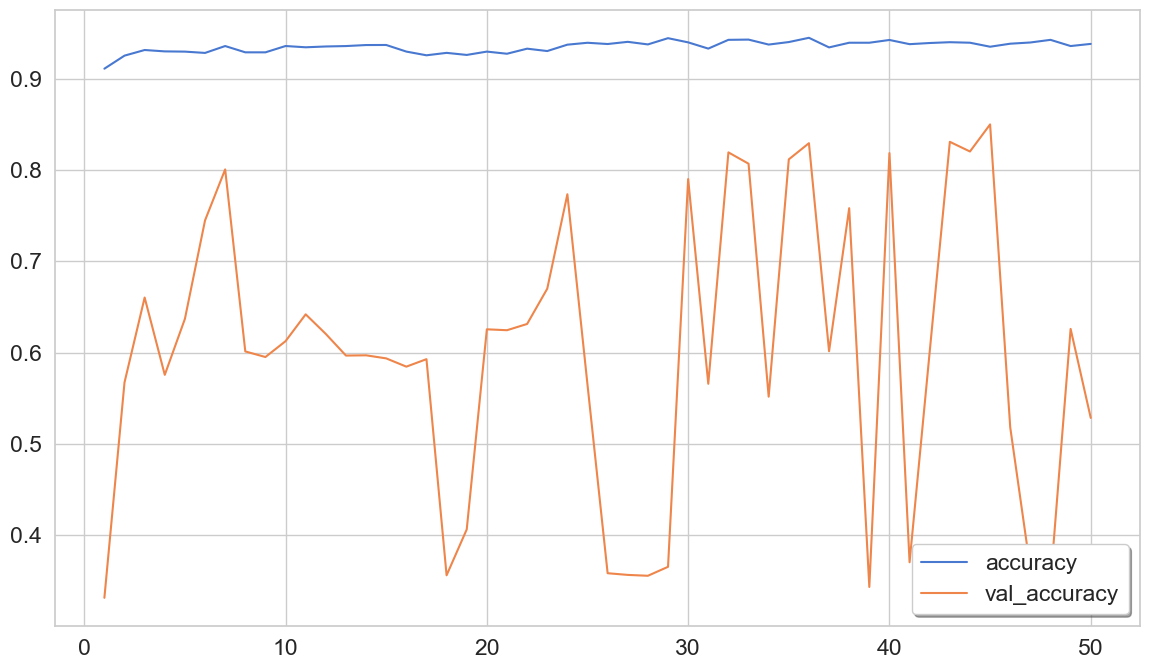

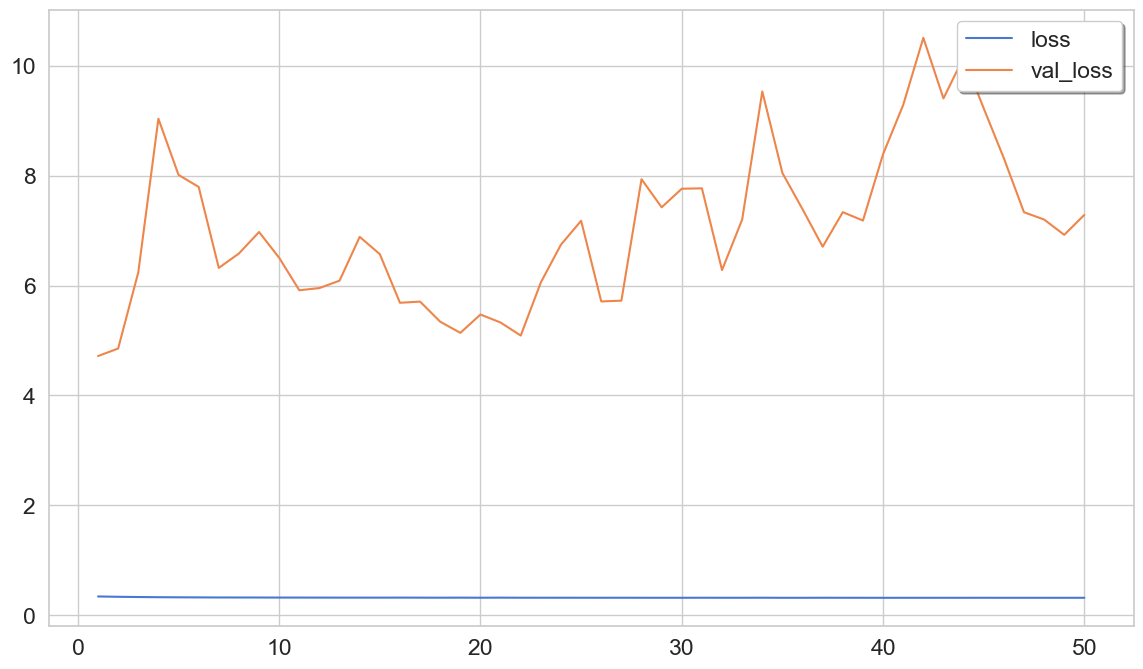

In [39]:
diagram(range(1, 51), history)